In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from lifeexpectancy', con=engine)
engine.dispose()

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
columns = data.columns
countries = data.Country.unique()

for c in countries:
    data.loc[data['Country']==c, columns] = data.loc[data['Country']==c, columns].interpolate()
data.dropna(inplace=True)
data.columns = columns.str.strip()
columns
# updata data columns and remove the empty space between the last word to the qoutation

# since it is a time series data, so applying interpolate to precess the missing values by assuming that obervations from the same
# country and similar year would have similar characteristics.

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

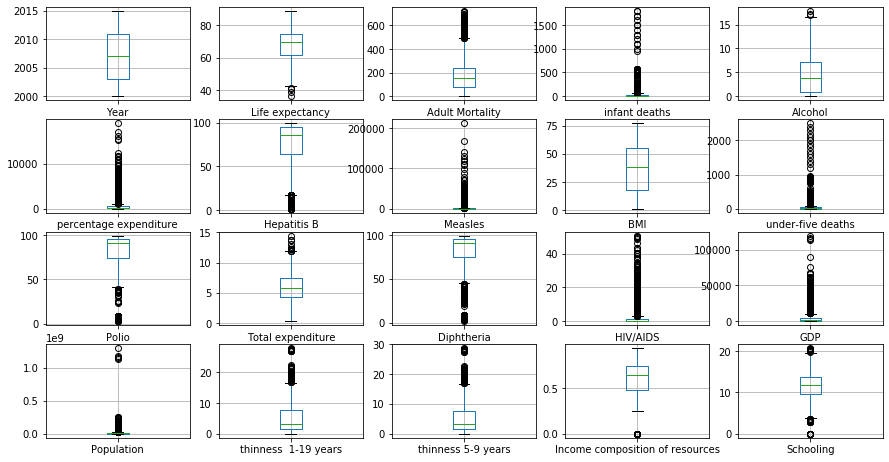

In [6]:
selected_columns = data.columns.drop(['Country','Status'])
plt.figure(figsize=(15,10))
for i in range(0,20):
    plt.subplot(5,5,i+1)
    boxplot = data.boxplot(column= selected_columns[i])

# infant deaths, Measles, under-five deaths were reported base on per 1000 population, so the number can not bigger than 1000
# percentage__expenditure should smaller than 100
# so these data contain wrong number and need to be removed

Text(0.5, 0, 'winsorize_under_five_deaths')

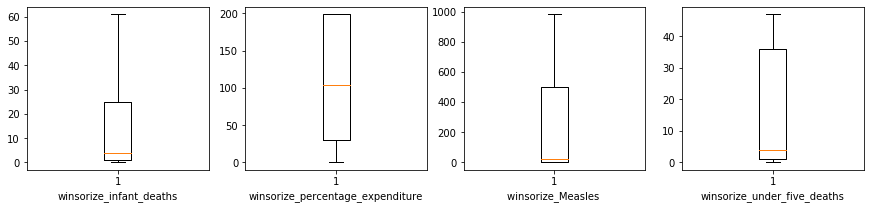

In [7]:
plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
data['winsorize_infant_deaths'] = winsorize(data['infant deaths'], (0, 0.1))
plt.boxplot(data['winsorize_infant_deaths'])
plt.xlabel('winsorize_infant_deaths')

plt.subplot(1,4,2)
data['winsorize_percentage_expenditure'] = winsorize(data['percentage expenditure'], (0, 0.4))
plt.boxplot(data['winsorize_percentage_expenditure'])
plt.xlabel('winsorize_percentage_expenditure')

plt.subplot(1,4,3)
data['winsorize_Measles'] = winsorize(data['Measles'], (0, 0.2))
plt.boxplot(data['winsorize_Measles'])
plt.xlabel('winsorize_Measles ')

plt.subplot(1,4,4)
data['winsorize_under_five_deaths'] = winsorize(data['under-five deaths'], (0, 0.2))
plt.boxplot(data['winsorize_under_five_deaths'])
plt.xlabel('winsorize_under_five_deaths')

# even removing 40% of the highest value, the average percentage expenditure still 100, which means most of the data is wrong or 
# not wrote as a percentage base. In the same time the percentage expenditure is similar to total expenditure, so this column
# so percentage expenditure may need to be removed

In [8]:
c = ['winsorize_percentage_expenditure' ]
data.drop(c, inplace=True, axis=1)
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'winsorize_infant_deaths', 'winsorize_Measles',
       'winsorize_under_five_deaths'],
      dtype='object')

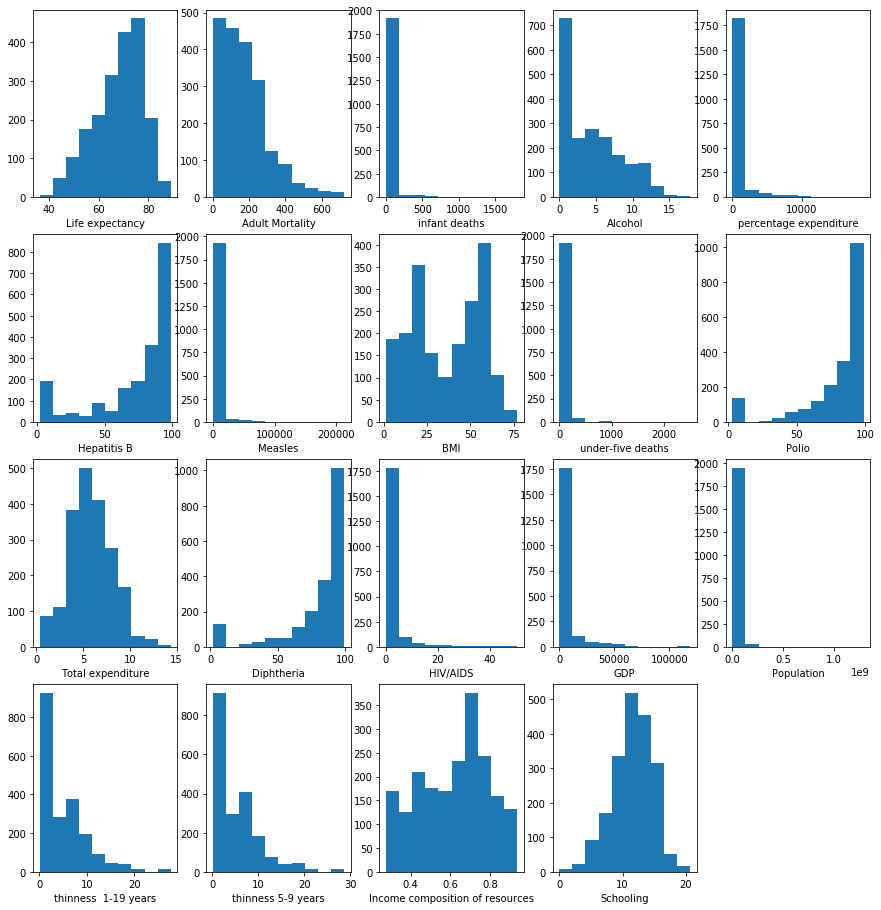

In [29]:
modified_columns = []

for c in data.columns.drop(['Country', 'Status', 'Year']):
    modified_columns.append(c)
    
plt.figure(figsize=(15,20))
for i in range(0,19):
    plt.subplot(5,5,i+1)
    plt.hist(data[modified_columns[i]])
    plt.xlabel(modified_columns[i])
    
# the life expenctancy is the most closed to normal distribution
# most or all of the data need to be remove the outliers or need the log transfomation in order to form a relatively 
# normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


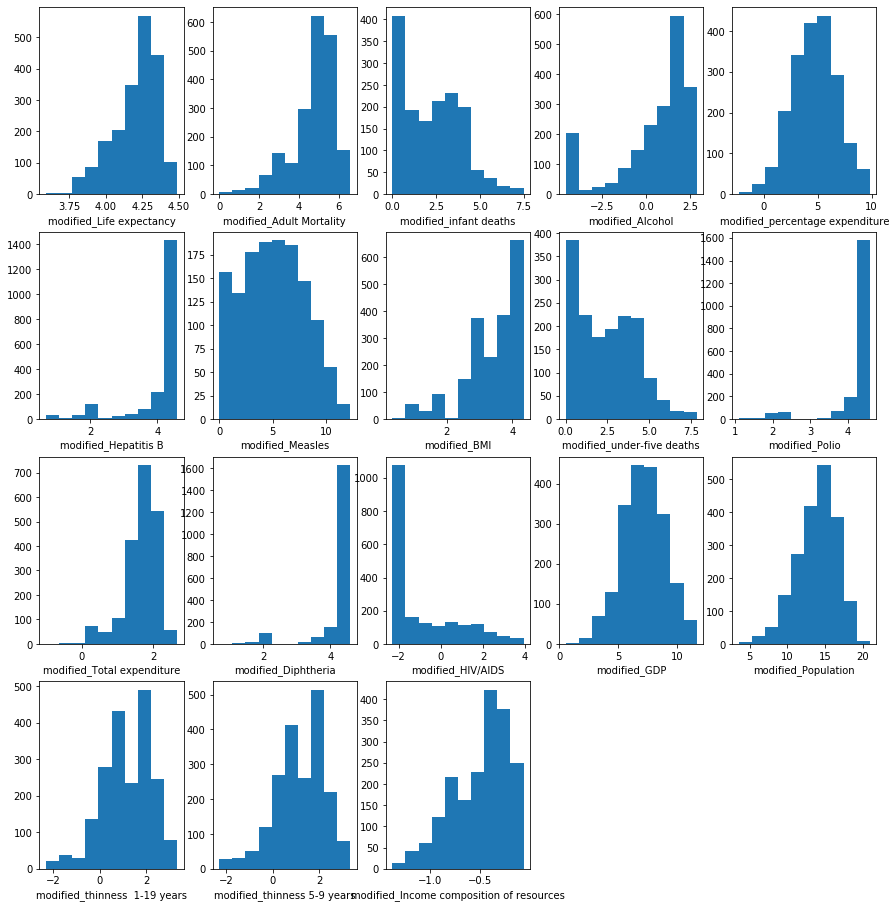

In [10]:
data.dropna()
data_modified = pd.DataFrame()
modified_columns = []
for c in data.columns.drop(['Country', 'Status', 'Year']):
    modified_columns.append(c)
    
names = []
for i in range(0, len(modified_columns)):    
    column_name = ('modified_{}'.format(modified_columns[i]))
    names.append(column_name)

#     np.log(data[data['Life expectancy']>0]['Life expectancy'])


for i in range(0, len(modified_columns)):
    data_modified[names[i]] = np.log(data[data[modified_columns[i]]>0][modified_columns[i]])
# data_modified.head()

modified_columns_1 = []
for c in data_modified.columns:
    modified_columns_1.append(c)
    
plt.figure(figsize=(15,20))
for i in range(0,18):
    plt.subplot(5,5,i+1)
    plt.hist(data_modified[modified_columns_1[i]])
    plt.xlabel(modified_columns_1[i])
    
# some log modified data tend to be a better normal distribution, while some does not change much 
# this step should have done after the correlation analysis(less variable to work with, since some of them will be removed
# due to strong correlation between different variables or less relavent with the target column)

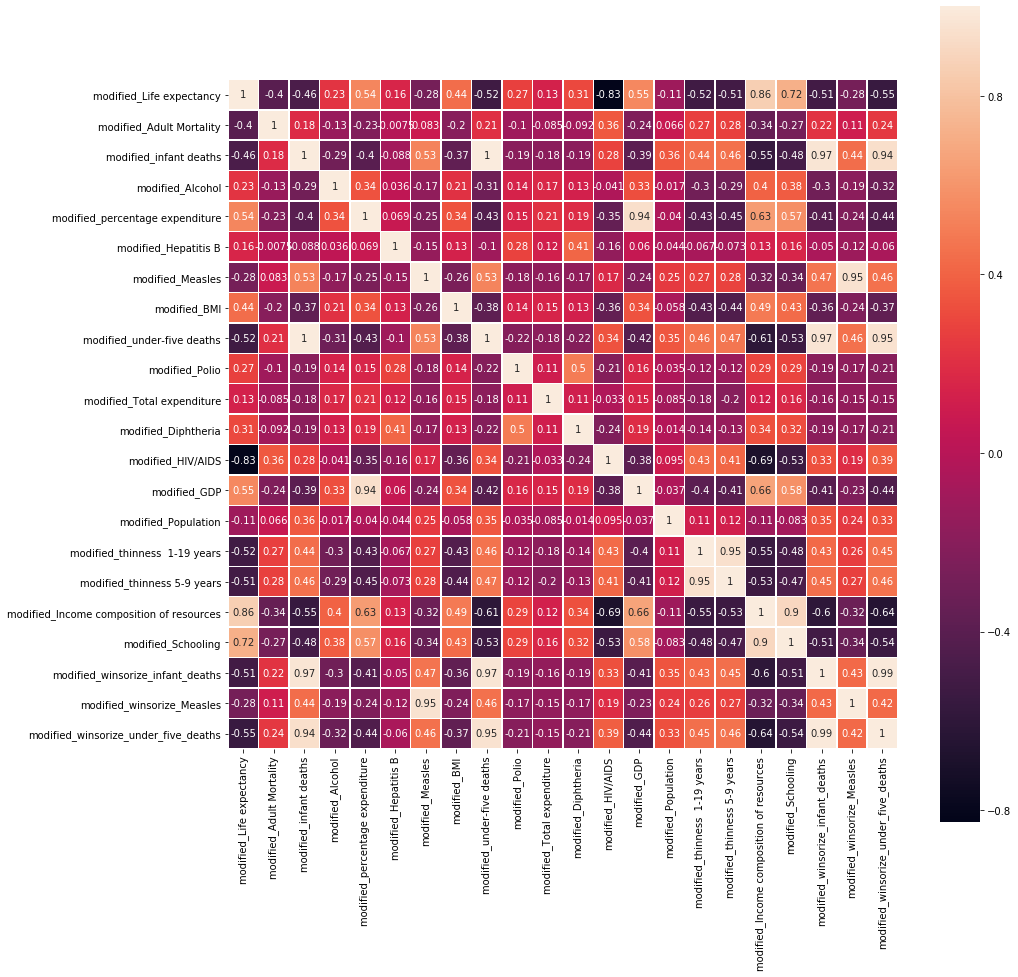

In [11]:
corr = data_modified.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

# the correlation showed that life expectancy has a strong positive relation with income_composition_resources and schooling
# has a strong negtive relation with HIV/AIDS
# has a moderate positive relation with GDP and BMI 
# has a moderate negetive relation with thinness  1-19 years, thinness 5-9 years, infant deaths, under_five_deaths and adult motality


In [12]:
data_modified.columns
# first of all remove all the variables that have a effect on life expectancy less 0.3 on the heatmap: 
# ('modified_Alcohol', 'modified_Hepatitis B', 'modified_Polio', 'modified_Total expenditure', 
# 'modified_Population', 'modified_winsorize_Measles')

# second, remove the variables which have very strong correlations: ('modified_thinness 5-9 years','modified_Schooling','modified_winsorize_infant_deaths'
# , 'modified_Income composition of resources', )

Index(['modified_Life expectancy', 'modified_Adult Mortality',
       'modified_infant deaths', 'modified_Alcohol',
       'modified_percentage expenditure', 'modified_Hepatitis B',
       'modified_Measles', 'modified_BMI', 'modified_under-five deaths',
       'modified_Polio', 'modified_Total expenditure', 'modified_Diphtheria',
       'modified_HIV/AIDS', 'modified_GDP', 'modified_Population',
       'modified_thinness  1-19 years', 'modified_thinness 5-9 years',
       'modified_Income composition of resources', 'modified_Schooling',
       'modified_winsorize_infant_deaths', 'modified_winsorize_Measles',
       'modified_winsorize_under_five_deaths'],
      dtype='object')

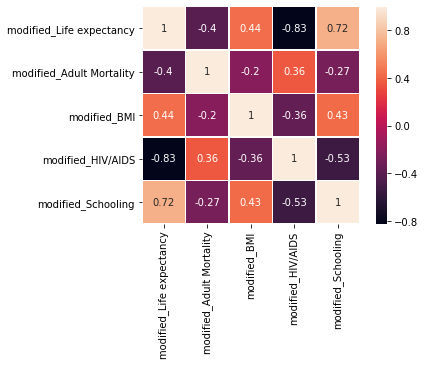

In [32]:
data_feature = data_modified.drop(['modified_Alcohol', 'modified_Hepatitis B', 'modified_Polio', 'modified_Total expenditure', 
'modified_Population', 'modified_winsorize_Measles', 'modified_thinness 5-9 years','modified_Income composition of resources',
'modified_winsorize_infant_deaths', 'modified_winsorize_under_five_deaths', 'modified_GDP', 'modified_thinness  1-19 years', 'modified_infant deaths'
                                  ,'modified_percentage expenditure','modified_Measles','modified_under-five deaths', 'modified_Diphtheria'], axis=1)

corr_feature = data_feature.corr()
sns.heatmap(corr_feature, square=True, annot=True, linewidths=.5)

(array([186., 167., 250., 378., 428., 240., 222.,  86.,  18.,  12.]),
 array([ 4.95831293,  6.65120111,  8.3440893 , 10.03697748, 11.72986566,
        13.42275385, 15.11564203, 16.80853021, 18.5014184 , 20.19430658,
        21.88719476]),
 <a list of 10 Patch objects>)

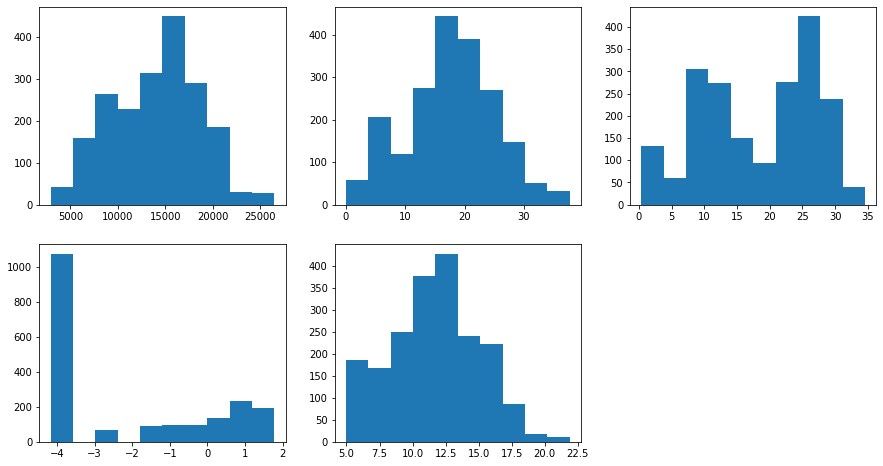

In [37]:
from scipy.stats import boxcox

df_final = pd.DataFrame()
df_final['Life_expectancy_boxcox'] = boxcox(data['Life expectancy'])[0]
df_final['Adult_Mortality_boxcox'] = boxcox(data['Adult Mortality'])[0]
df_final['BMI_boxcox'] = boxcox(data['BMI'])[0]
df_final['HIV/AIDS_boxcox'] = boxcox(data['HIV/AIDS'])[0]

# for doing boxcox, data need to be positive, so winsorize for the smallest values has been applied
data['Schooling'] = winsorize(data['Schooling'], (0.0001, 0))
df_final['Schooling_boxcox'] = boxcox(data['Schooling'])[0]

plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.hist(df_final['Life_expectancy_boxcox'])

plt.subplot(2,3,2)
plt.hist(df_final['Adult_Mortality_boxcox'])

plt.subplot(2,3,3)
plt.hist(df_final['BMI_boxcox'])

plt.subplot(2,3,4)
plt.hist(df_final['HIV/AIDS_boxcox'])

plt.subplot(2,3,5)
plt.hist(df_final['Schooling_boxcox'])



In [41]:
df_final.corr()
# df_final.columns

,Life_expectancy_boxcox,Adult_Mortality_boxcox,BMI_boxcox,HIV/AIDS_boxcox,Schooling_boxcox
Life_expectancy_boxcox,1.000000,-0.554897,0.583477,-0.777887,0.782883
Adult_Mortality_boxcox,-0.554897,1.000000,-0.326472,0.481721,-0.380204
BMI_boxcox,0.583477,-0.326472,1.000000,-0.491672,0.578715
HIV/AIDS_boxcox,-0.777887,0.481721,-0.491672,1.000000,-0.606513
Schooling_boxcox,0.782883,-0.380204,0.578715,-0.606513,1.000000


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_final[['Adult_Mortality_boxcox', 'BMI_boxcox',
       'HIV/AIDS_boxcox', 'Schooling_boxcox']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=4)
pca_ = sklearn_pca.fit_transform(X)

print(sklearn_pca.explained_variance_ratio_)
print(pca_)

# pca_1=[]
# pca_2=[]
# pca_3=[]
# pca_4=[]
# for i in pca_:
#     pca_1.append(i[0])
#     pca_2.append(i[1])
#     pca_3.append(i[2])
#     pca_4.append(i[3])
# df_final['pca_1'] = pca_1
# df_final['pca_2'] = pca_2
# df_final['pca_3'] = pca_3
# df_final['pca_4'] = pca_4
# looks like the first two primary components can explain almost 80% of the variance, then the feature numbers comes to two

[0.61156255 0.17967889 0.11815716 0.09060141]
[[-0.57250374 -0.01570489  1.16800775 -0.79352249]
 [-0.62338503 -0.02930207  1.1926675  -0.81659701]
 [-0.64766016  0.00804305  1.1961927  -0.82958052]
 ...
 [-1.14570633  0.7959177  -1.13544272  0.8521435 ]
 [-2.59301104 -1.8423591  -0.02823186  0.28698829]
 [-2.57452798 -1.77495269 -0.03963508  0.3057868 ]]


In [96]:
# df_final.drop(columns=['pca_'], inplace=True)
df_final.corr()
# looks like pca_1 has a higher correlation with life expectancy

,Life_expectancy_boxcox,Adult_Mortality_boxcox,BMI_boxcox,HIV/AIDS_boxcox,Schooling_boxcox,pca_1,pca_2,pca_3,pca_4
Life_expectancy_boxcox,1.000000,-0.554897,0.583477,-0.777887,0.782883,8.701710e-01,5.577139e-03,1.665243e-01,5.113015e-02
Adult_Mortality_boxcox,-0.554897,1.000000,-0.326472,0.481721,-0.380204,-6.725909e-01,-6.947591e-01,2.355214e-01,-9.726729e-02
BMI_boxcox,0.583477,-0.326472,1.000000,-0.491672,0.578715,7.709309e-01,-4.076084e-01,-4.581015e-01,-1.722324e-01
HIV/AIDS_boxcox,-0.777887,0.481721,-0.491672,1.000000,-0.606513,-8.368079e-01,-7.144077e-02,-4.066047e-01,3.596127e-01
Schooling_boxcox,0.782883,-0.380204,0.578715,-0.606513,1.000000,8.362354e-01,-2.545132e-01,2.048755e-01,4.404082e-01
pca_1,0.870171,-0.672591,0.770931,-0.836808,0.836235,1.000000e+00,-6.978205e-16,-1.635694e-16,-1.744664e-16
pca_2,0.005577,-0.694759,-0.407608,-0.071441,-0.254513,-6.978205e-16,1.000000e+00,9.453787e-17,2.264055e-16
pca_3,0.166524,0.235521,-0.458101,-0.406605,0.204875,-1.635694e-16,9.453787e-17,1.000000e+00,1.494333e-16
pca_4,0.051130,-0.097267,-0.172232,0.359613,0.440408,-1.744664e-16,2.264055e-16,1.494333e-16,1.000000e+00
